In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Euler
def Euler_1st_RC(t, h):
    
    #init value of charge
    q = 0
    N = int(t/h)
    for i in range(N):
        q = q + h*(1-q) 
        
    return q

In [3]:

t_s = np.linspace(0, 5, 101)

#analytical solution
q1 = 1 - np.exp(-t_s)

h = 10**-4

In [4]:

q2 = np.zeros(len(t_s))
for i, t in enumerate(t_s):
    q2[i] = Euler_1st_RC(t, h)

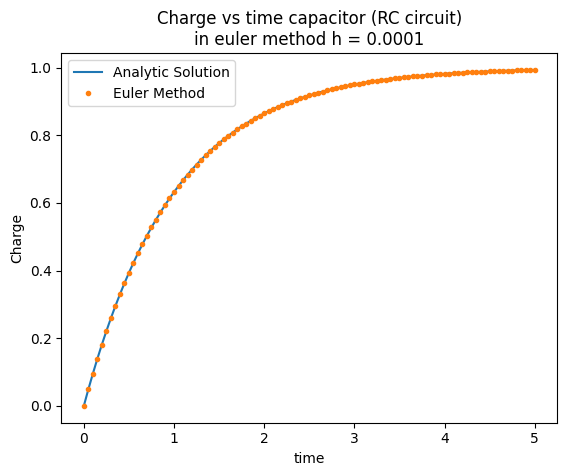

In [5]:
plt.plot(t_s, q1, label='Analytic Solution')
plt.plot(t_s, q2, '.', label='Euler Method')
plt.xlabel('time')
plt.ylabel('Charge')
plt.title("Charge vs time capacitor (RC circuit)\nin euler method h = %s"%h)
plt.legend()

In [6]:
#diff values for h
h_s = np.array([0.001, 0.005, 0.01, 0.02, 0.05, 0.1])

rel_err = np.zeros(len(h_s))

T = 5

#analytical solution for charge
Q = 1 - np.exp(-T)

#relative error
for i, h in enumerate(h_s):
    rel_err[i] = abs(Q - Euler_1st_RC(T, h_s[i]))/Q

print(100*rel_err)   

[0.00169492 0.00845481 0.01686    0.03352087 0.08229629 0.15949183]


Text(0.5, 1.0, 'relative error vs h')

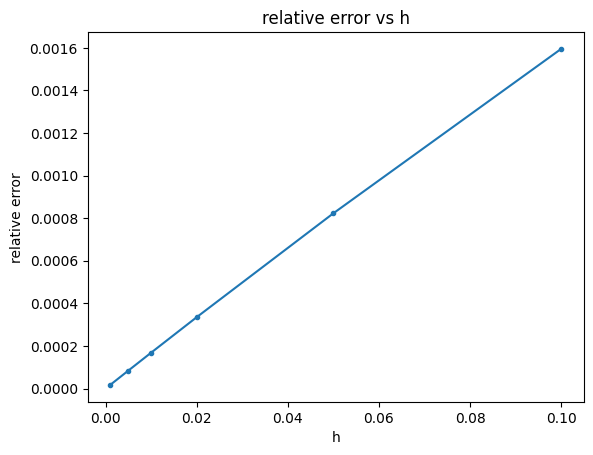

In [7]:
plt.plot(h_s, rel_err, '.-')
plt.xlabel('h')
plt.ylabel('relative error')
plt.title('relative error vs h')

In [8]:
#algorithm instability
def new_algorithm(t, h):

    N = int(t/h)

    if N == 0:
        return 0

    elif N == 1:
        return h

    else:
        q = np.zeros(N)
        q[0] = 0
        q[1] = h

        for i in range(N-2):
            q[i+2] = q[i] + 2*h*(1 - q[i+1])

        return q[-1]

h = 0.01

t_s = np.linspace(0, 8, 161)

q1 = 1 - np.exp(-t_s) #analytical
q2 = np.zeros(len(t_s))
for i, t in enumerate(t_s):
    q2[i] = Euler_1st_RC(t, h) #Euler
q3 = np.zeros(len(t_s))
for i, t in enumerate(t_s):
    q3[i] = new_algorithm(t, h) #new

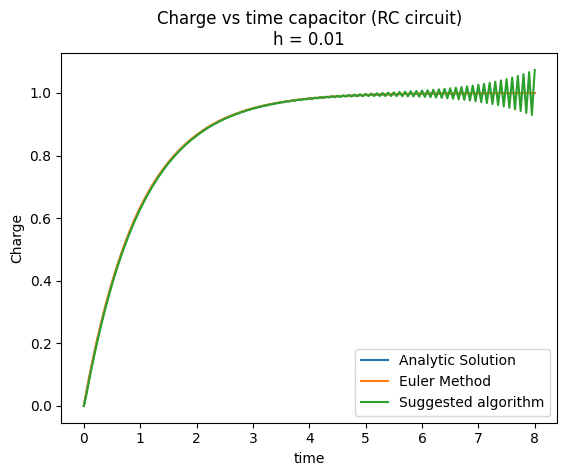

In [9]:
plt.plot(t_s, q1, label='Analytic Solution')
plt.plot(t_s, q2, label='Euler Method')
plt.plot(t_s, q3, label='Suggested algorithm')
plt.xlabel('time')
plt.ylabel('Charge')
plt.title("Charge vs time capacitor (RC circuit)\nh = %s"%h)
plt.legend()

In [10]:
#euler second ODE
def Euler_2nd_HO(t, h):
    x = 1
    v = 0
    N = int(t/h)
    for i in range(N):
        a = -x
        x = x + h*v
        v = v + h*a
    return x, v

In [11]:
def Euler_Cromer(t, h):
    x = 1
    v = 0
    N = int(t/h)
    for i in range(N):
        v = v - h*x
        x = x + h*v
    return x, v

In [12]:
def Frog_Leaping(t, h):
    x = 1
    v = -h/2
    N = int(t/h)
    for i in range(N):
        x = x + v*h
        v = v - x*h
    return x, (v + h*x/2)

In [13]:
def Verlet(t, h):
    x_befor = 1
    x = 1
    v = 0
    N = int(t/h)
    h2 = h**2
    for i in range(N):
        x_next = -x_befor + 2*x - h2*x
        v = (x_next - x_befor)/(2*h)
        x_befor = x
        x = x_next
    return x_befor, v

In [14]:
def velocity_verlet(t, h):
    x = 1
    v = 0
    N = int(t/h)
    h2 = h**2
    for i in range(N):
        a = -x
        x = x + h*v + a*h2/2
        v = v + h*(-x+a)/2
    return x, v

In [15]:
def Beeman(t, h):
    x_befor = 1
    x = 1
    v = 0
    N = int(t/h)
    h2 = h**2
    for i in range(N):
        x_next = x + h*v - (4*x - x_befor)*h2/6
        v = v - (2*x_next + 5*x - x_befor)*h/6
        x_befor = x
        x = x_next
    return x, v

In [16]:
h = 10**-3
t_s = np.linspace(0, 20*np.pi, 1200)
x_e = np.zeros(len(t_s))
v_e = np.zeros(len(t_s))
x_ec = np.zeros(len(t_s))
v_ec = np.zeros(len(t_s))
x_f = np.zeros(len(t_s))
v_f = np.zeros(len(t_s))
x_v = np.zeros(len(t_s))
v_v = np.zeros(len(t_s))
x_vv = np.zeros(len(t_s))
v_vv = np.zeros(len(t_s))
x_b = np.zeros(len(t_s))
v_b = np.zeros(len(t_s))

In [17]:
for i, t in enumerate(t_s):
    x1, v1 = Euler_2nd_HO(t, h)
    x2, v2 = Euler_Cromer(t, h)
    x3, v3 = Frog_Leaping(t, h)
    x4, v4 = Verlet(t, h)
    x5, v5 = velocity_verlet(t, h)
    x6, v6 = Beeman(t, h)
    x_e[i] = x1
    v_e[i] = v1
    x_ec[i] = x2
    v_ec[i] = v2
    x_f[i] = x3
    v_f[i] = v3
    x_v[i] = x4
    v_v[i] = v4
    x_vv[i] = x5
    v_vv[i] = v5
    x_b[i] = x6
    v_b[i] = v6

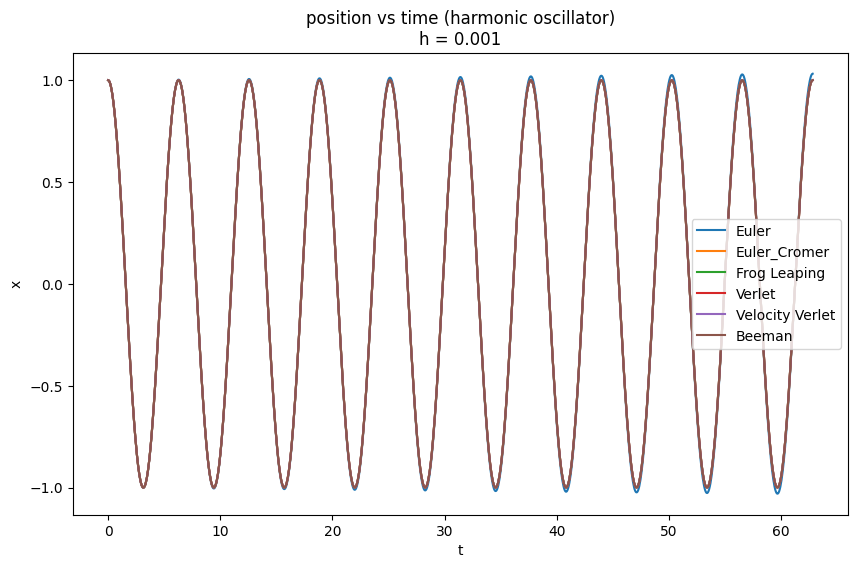

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(t_s, x_e, label='Euler')
plt.plot(t_s, x_ec, label='Euler_Cromer')
plt.plot(t_s, x_f, label='Frog Leaping')
plt.plot(t_s, x_v, label='Verlet')
plt.plot(t_s, x_vv, label='Velocity Verlet')
plt.plot(t_s, x_b, label='Beeman')
plt.xlabel('t')
plt.ylabel('x')
plt.title('position vs time (harmonic oscillator)\nh = %s'%h)
plt.legend(loc='center right')